<a href="https://colab.research.google.com/github/sujalshrstha/aiwroksheet/blob/main/2431235_sujalshrestha_drugClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Project

**Name:** Sujal Shrestha  
**Class:** L5CG19
**University ID:** 2431235



---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Assesment Ai/drug200.csv'
data = pd.read_csv(file_path)


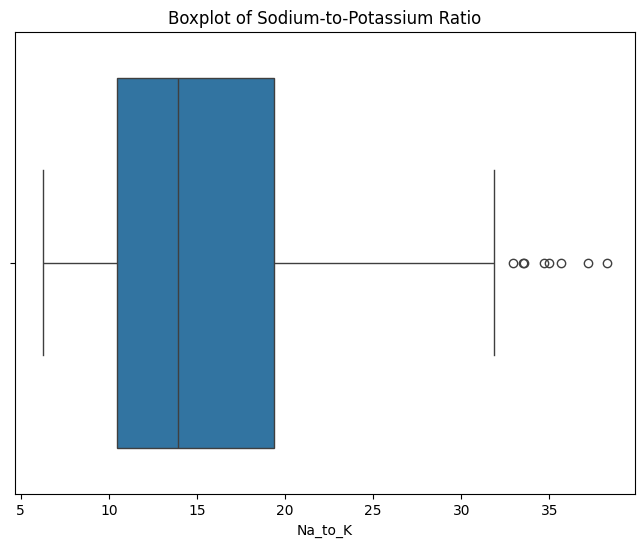

In [ ]:
# Boxplot for detecting outliers in Na_to_K (Sodium-to-Potassium Ratio)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Na_to_K'])
plt.title('Boxplot of Sodium-to-Potassium Ratio')
plt.show()


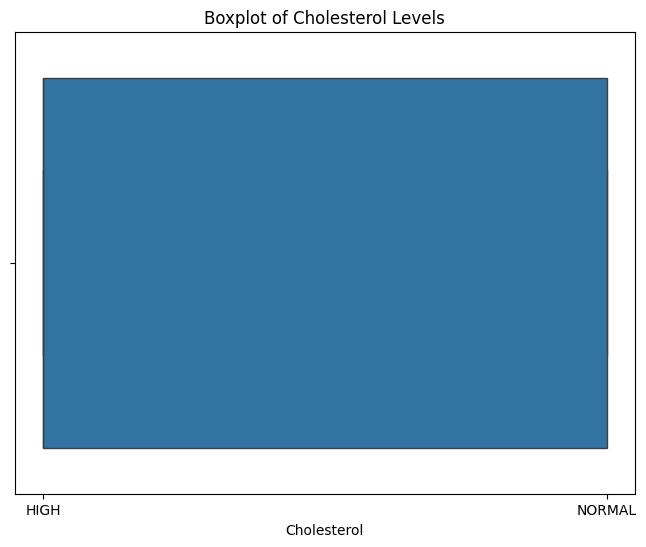

In [ ]:
# Boxplot for detecting outliers in Cholesterol
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Cholesterol'])
plt.title('Boxplot of Cholesterol Levels')
plt.show()

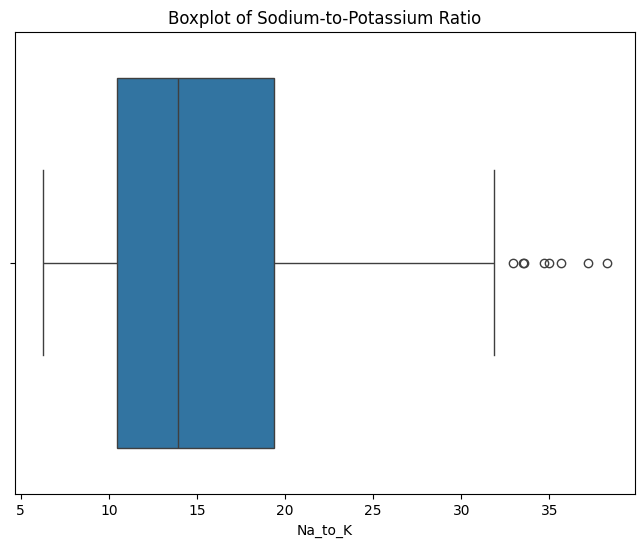

In [ ]:
# Boxplot for detecting outliers in Na_to_K (Sodium-to-Potassium Ratio)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Na_to_K'])
plt.title('Boxplot of Sodium-to-Potassium Ratio')
plt.show()


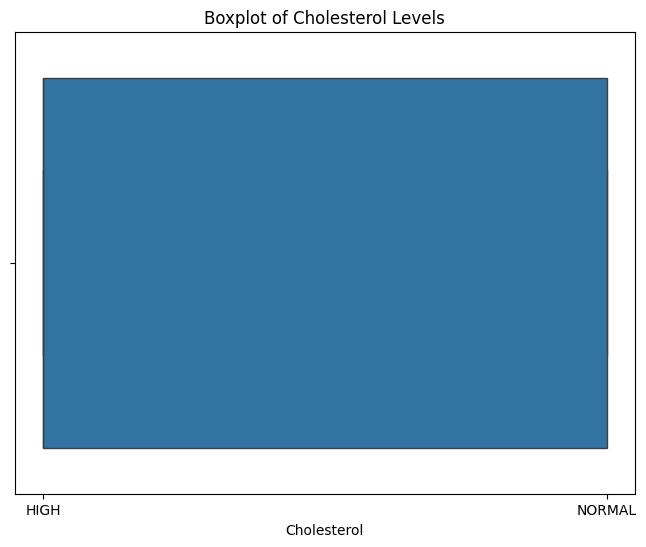

In [ ]:
# Boxplot for detecting outliers in Cholesterol
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Cholesterol'])
plt.title('Boxplot of Cholesterol Levels')
plt.show()

In [ ]:
# Display the first few rows
print(data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [ ]:
# Basic statistical summary
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [ ]:
# Encode categorical variables for correlation
encoded_data = data.copy()
encoded_data['Sex'] = encoded_data['Sex'].map({'M': 1, 'F': 0})  # Encoding Sex as 1 and 0
encoded_data['BP'] = encoded_data['BP'].map({'HIGH': 2, 'NORMAL': 1, 'LOW': 0})  # Encoding BP as 0, 1, 2
encoded_data['Cholesterol'] = encoded_data['Cholesterol'].map({'HIGH': 1, 'NORMAL': 0})  # Encoding Cholesterol
# Ensure the Drug column is correctly converted to integer labels
encoded_data['Drug'] = encoded_data['Drug'].astype('category').cat.codes
y = encoded_data['Drug'].values.astype(int)  # Convert to integer explicitly



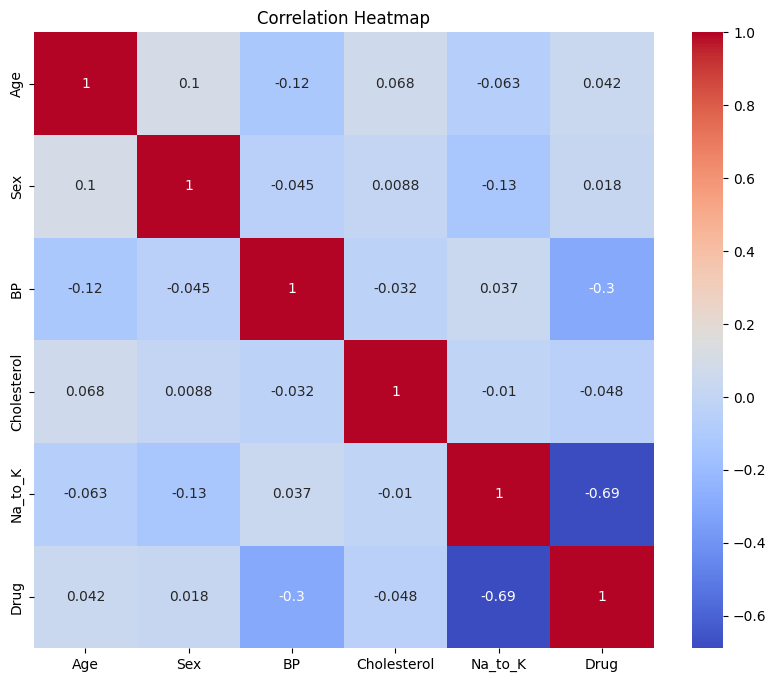

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

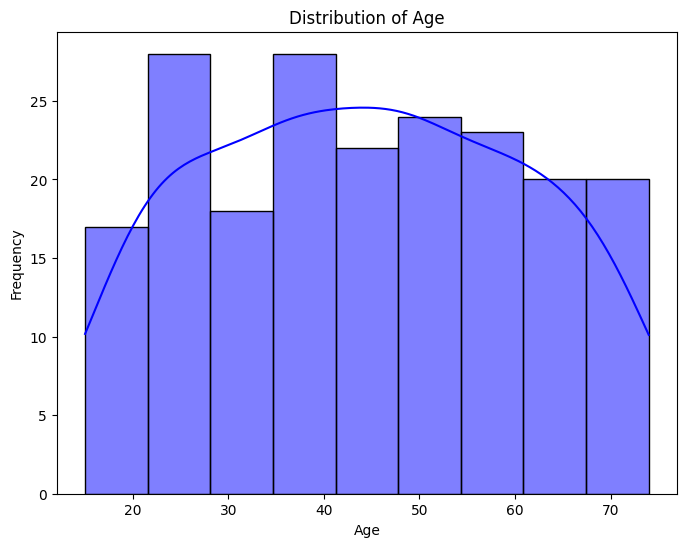

In [ ]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, color='blue')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

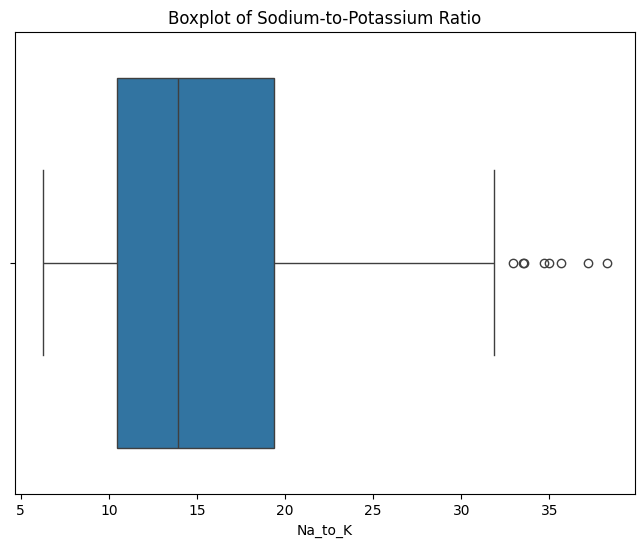

In [ ]:
# Boxplot for detecting outliers in Na_to_K (Sodium-to-Potassium Ratio)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Na_to_K'])

plt.title('Boxplot of Sodium-to-Potassium Ratio')
plt.show()

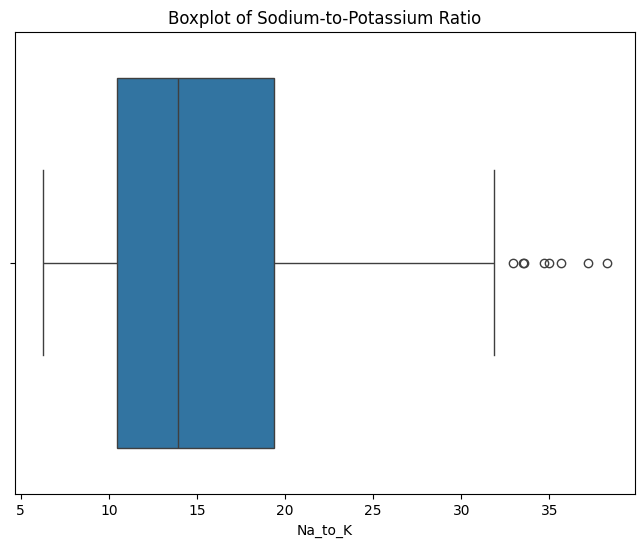

In [ ]:
# Boxplot for detecting outliers in Na_to_K (Sodium-to-Potassium Ratio)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Na_to_K'])
plt.title('Boxplot of Sodium-to-Potassium Ratio')
plt.show()


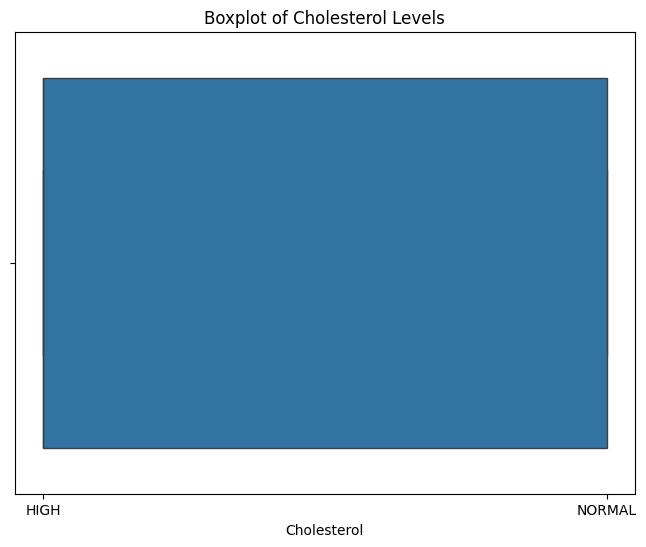

In [ ]:
# Boxplot for detecting outliers in Cholesterol
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Cholesterol'])
plt.title('Boxplot of Cholesterol Levels')
plt.show()

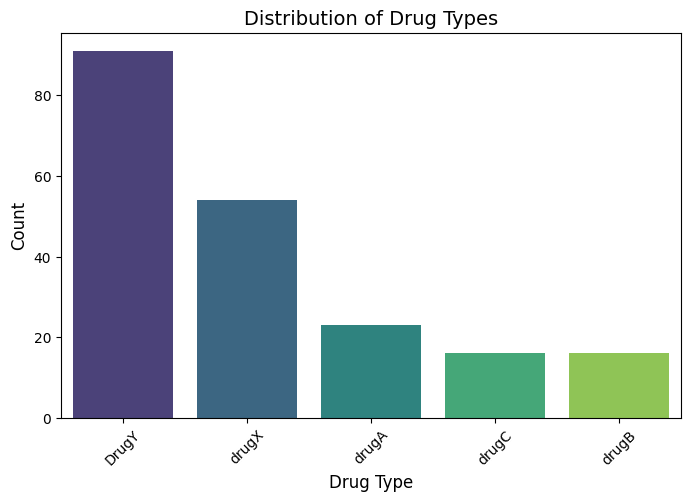

In [ ]:
# Create a bar plot with hue set to the drug type
plt.figure(figsize=(8, 5))
sns.barplot(x=drug_counts.index, y=drug_counts.values, hue=drug_counts.index, palette='viridis', legend=False)

# Add labels and title
plt.xlabel("Drug Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Drug Types", fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better visibility

# Show the plot
plt.show()


In [ ]:
# Step 2: Preprocess the data
# Assuming 'Drug' is your target variable and the rest are features
X = data.drop(columns=['Drug'])  # Features
y = data['Drug']  # Target variable

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split # Import the function




In [ ]:
# Normalize features manually
def min_max_scaling(X):
    # Convert categorical columns to numerical using one-hot encoding
    X = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)  # One-hot encode
    # Convert boolean columns to numeric (0 or 1) if any
    for col in X.select_dtypes(include=['bool']).columns:
        X[col] = X[col].astype(int)  # Convert True to 1, False to 0
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = min_max_scaling(X)

In [ ]:
# Convert to one-hot encoding
def one_hot_encode(y, num_classes):
    # If y is a Pandas Series, convert it to a NumPy array
    if isinstance(y, pd.Series):
        y = y.to_numpy()

    # Get unique classes and their mapping to indices
    unique_classes = np.unique(y)
    class_to_index = {cls: i for i, cls in enumerate(unique_classes)}

    # Map the original labels to numerical indices
    y_numeric = np.array([class_to_index[val] for val in y])

    encoded = np.zeros((y.shape[0], num_classes))
    for i, val in enumerate(y_numeric):  # Use y_numeric here
        encoded[i, int(val)] = 1         # int(val)

    return encoded # Add this return statement

In [ ]:
# Assuming y has 5 unique classes (DrugY, drugC, drugX, drugA, drugB)
y_encoded_onehot = one_hot_encode(y, num_classes=5)

# Manual Train-Test Split (code remains the same)
def train_test_split_manual(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    # Use .iloc to select rows based on integer indices
    return X.iloc[indices[:split_idx]], X.iloc[indices[split_idx:]], y[indices[:split_idx]], y[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split_manual(X_scaled, y_encoded_onehot, test_size=0.2)

In [ ]:
#Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability fix
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Categorical Cross-Entropy Loss
def categorical_log_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-15)) / y_true.shape[0]

# Gradient Descent for Softmax Regression
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = y.shape[1]
        self.W = np.random.randn(num_features, num_classes) * 0.01
        self.b = np.zeros((1, num_classes))

        for _ in range(self.epochs):
            logits = np.dot(X, self.W) + self.b
            y_pred = softmax(logits)
            grad_W = np.dot(X.T, (y_pred - y)) / num_samples
            grad_b = np.sum(y_pred - y, axis=0, keepdims=True) / num_samples
            self.W -= self.learning_rate * grad_W
            self.b -= self.learning_rate * grad_b

    def predict(self, X):
        logits = np.dot(X, self.W) + self.b
        return np.argmax(softmax(logits), axis=1)

In [ ]:
# Train the model
model = SoftmaxRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Compute accuracy manually
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
# Compute precision, recall, F1-score manually
def precision_recall_f1(y_true, y_pred, num_classes):
    precision, recall, f1 = [], [], []
    for c in range(num_classes):
        tp = np.sum((y_pred == c) & (y_true == c))
        fp = np.sum((y_pred == c) & (y_true != c))
        fn = np.sum((y_pred != c) & (y_true == c))

        prec = tp / (tp + fp + 1e-15)
        rec = tp / (tp + fn + 1e-15)
        f1_score = 2 * (prec * rec) / (prec + rec + 1e-15)

        precision.append(prec)
        recall.append(rec)
        f1.append(f1_score)

    return precision, recall, f1


In [ ]:
# Compute confusion matrix manually
def confusion_matrix_manual(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(y_true)):
        cm[int(y_true[i]), int(y_pred[i])] += 1
    return cm

In [ ]:
# Evaluation
train_acc = accuracy(np.argmax(y_train, axis=1), y_pred_train)
test_acc = accuracy(np.argmax(y_test, axis=1), y_pred_test)
precision_train, recall_train, f1_train = precision_recall_f1(np.argmax(y_train, axis=1), y_pred_train, len(np.unique(y)))
precision_test, recall_test, f1_test = precision_recall_f1(np.argmax(y_test, axis=1), y_pred_test, len(np.unique(y)))
conf_matrix_train = confusion_matrix_manual(np.argmax(y_train, axis=1), y_pred_train, len(np.unique(y)))
conf_matrix_test = confusion_matrix_manual(np.argmax(y_test, axis=1), y_pred_test, len(np.unique(y)))

In [ ]:
print("Train Set Evaluation:")
print("Accuracy:", train_acc)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)
print("Confusion Matrix:")
print(conf_matrix_train)


Train Set Evaluation:
Accuracy: 0.5625
Precision: [0.5035460992907801, 0.0, 0.0, 0.0, 1.0]
Recall: [1.0, 0.0, 0.0, 0.0, 0.4418604651162791]
F1-score: [0.6698113207547164, 0.0, 0.0, 0.0, 0.6129032258064512]
Confusion Matrix:
[[71  0  0  0  0]
 [17  0  0  0  0]
 [15  0  0  0  0]
 [14  0  0  0  0]
 [24  0  0  0 19]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded_onehot, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [ ]:
# Evaluate Decision Tree Model
dt_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(dt_predictions, axis=1))  # Convert predictions to class labels
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(dt_predictions, axis=1), average=None) # Convert predictions to class labels
dt_cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(dt_predictions, axis=1)) # Convert predictions to class labels

In [ ]:
print("\nDecision Tree Evaluation:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-score: {dt_f1}")
print("Confusion Matrix:")
print(dt_cm)


Decision Tree Evaluation:
Accuracy: 1.0000
Precision: [1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1.]
F1-score: [1. 1. 1. 1. 1.]
Confusion Matrix:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


In [ ]:
# Train Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded_onehot, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Evaluate Random Forest Model
rf_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(rf_predictions, axis=1))  # Convert to class labels
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(rf_predictions, axis=1), average=None)  # Convert to class labels
rf_cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(rf_predictions, axis=1))  # Convert to class labels

In [ ]:
print("\nRandom Forest Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")
print("Confusion Matrix:")
print(rf_cm)



Random Forest Evaluation:
Accuracy: 1.0000
Precision: [1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1.]
F1-score: [1. 1. 1. 1. 1.]
Confusion Matrix:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


In [ ]:
# Hyperparameter Optimization for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)


Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Hyperparameter Optimization for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Decision Tree Feature Selection
# Store original column names
original_columns = X_train.columns  # Get columns from the preprocessed data

# Feature Selection using Recursive Feature Elimination (RFE) for Decision Tree
rfe_dt = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=5)
rfe_dt.fit(X_train, y_train)
selected_features_rfe_dt = original_columns[rfe_dt.support_]  # Use original column names
print("Top Features using RFE (Decision Tree):", list(selected_features_rfe_dt))

# Feature Selection using Recursive Feature Elimination (RFE) for Random Forest
rfe_rf = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
rfe_rf.fit(X_train, y_train)
selected_features_rfe_rf = original_columns[rfe_rf.support_]  # Use original column names
print("Top Features using RFE (Random Forest):", list(selected_features_rfe_rf))

Top Features using RFE (Decision Tree): ['Age', 'Na_to_K', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL']
Top Features using RFE (Random Forest): ['Age', 'Na_to_K', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL']


In [ ]:
# Define selected features from RFE
selected_features_original = ['Age', 'Na_to_K', 'BP', 'Cholesterol']
X_selected = data[selected_features_original].copy()  # Copy to avoid modifying the original DataFrame

# One-Hot Encoding for Categorical Features (BP and Cholesterol)
X_selected = pd.get_dummies(X_selected, columns=['BP', 'Cholesterol'], drop_first=True)

# Split into train and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Use best hyperparameters from GridSearchCV
best_rf_params = rf_grid_search.best_params_

# Build and train the final Random Forest model with best hyperparameters
final_model = RandomForestClassifier(**best_rf_params, random_state=42)
final_model.fit(X_train_selected, y_train)

# Make predictions
final_predictions = final_model.predict(X_test_selected)

# Evaluate model
final_accuracy = accuracy_score(y_test, final_predictions)
final_precision, final_recall, final_f1, _ = precision_recall_fscore_support(y_test, final_predictions, average='macro')  # Macro for multiclass
final_cm = confusion_matrix(y_test, final_predictions)

# Print evaluation metrics
print("\nFinal Model Performance (Optimized Random Forest for Multiclass Classification):")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision (Macro-Averaged): {final_precision:.4f}")
print(f"Recall (Macro-Averaged): {final_recall:.4f}")
print(f"F1-score (Macro-Averaged): {final_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")


Final Model Performance (Optimized Random Forest for Multiclass Classification):
Accuracy: 0.9750
Precision (Macro-Averaged): 0.9895
Recall (Macro-Averaged): 0.9818
F1-score (Macro-Averaged): 0.9851
Confusion Matrix:
[[18  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  0 10]]
